## Logistic Regression
* See pg 143- for introduction and cost function
* The cost function for logistic regression = log loss
* In Logistic regression, there is no closed-form equation to compute theta that minimized the log loss  
but the cost function is convex, so GD is guaranteed to find the global minimum.

### Decision boundaries

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Using the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys())) # shows feature names
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if iris virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


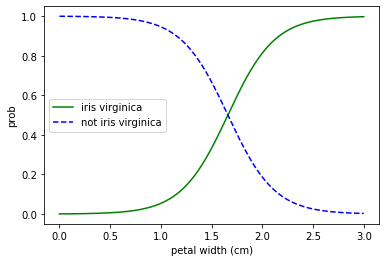

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "not iris virginica")
plt.xlabel("petal width (cm)")
plt.ylabel("prob")
plt.legend(loc="center left")
# Where the two curves meet is the decision boundary (at around 1.6cm).
# Just like the other linear models, logistic regression models can be regularized using l1 or l2 penalties
# but this time, the regularization strength is not alpha but it's inverse: c

In [27]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax regression
* the logistic regression model can be generalized to support multiple classes directly,  
without having to train and combine multiple binary classifiers.
* This is called 'softmax regresson' or 'multinomial logistic regression'.
* The idea: when given an instance x, the softmax reg model first computes a score s_k(x)  
for each class k. then estimates the prob of each class by applying 'softmax function'  
to the scores. The scores are called 'logit' or 'log-odds'
* See pg 148 for more details
#### Training
* The objective is to have a model that estimates a high prob for the target class.
* Minimizing the cost function (called 'cross-entropy') should lead to this objective  
b/c it penalizes the model when it estimates a low prob for a target class.
* Cross entropy is frequently used to measure how well a set of estimated class probs matches  
the target classes.

In [28]:
# Demo: will try to classify the iris flower into all three classes.
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs", C=10) # larger the c, less the regularization
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
softmax_reg.predict_proba([[5, 2]]) # among the classes 0, 1, 2, the 2 has the highest prob


[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])